# Part I -  Loan Data from Prosper Exploration
## by Rania Souri

## Introduction
> Loan Data is a dataset that contains 113937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many other features.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#df=pd.read_csv('prosperLoanData.csv')
df=pd.read_csv(r'C:\Users\lenovo\Desktop\udacity alx scholarship\Project 3\prosperLoanData.csv')

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#dataset column name
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df.shape

(113937, 81)

In [4]:
#Selecting features for the exploration
df1 = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','Occupation', 'ListingCategory (numeric)','EmploymentStatus','LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment',
      'CreditScoreRangeLower','CreditScoreRangeUpper']]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   Occupation                 110349 non-null  object 
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   EmploymentStatus           111682 non-null  object 
 8   LoanOriginalAmount         113937 non-null  int64  
 9   StatedMonthlyIncome        113937 non-null  float64
 10  MonthlyLoanPayment         113937 non-null  float64
 11  CreditScoreRangeLower      113346 non-null  float64
 12  CreditScoreRangeUpper      113346 non-null  float64
dtypes: float64(6), int64(3), obje

>- **The columns 'BorrowerAPR', 'Occupation', 'EmploymentStatus', CreditScoreRangeLower', CreditScoreRangeUpper  have missing values.**

In [9]:
#checking the duplicated values
df1.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [10]:
df1['LoanKey'].duplicated().value_counts() #check the duplicated if they concern also the rimary key

False    113066
True        871
Name: LoanKey, dtype: int64

In [6]:
#871 duplicated values, we will drop them
df1=df1.drop_duplicates()

In [12]:
#Test
df1.duplicated().value_counts()

False    113066
dtype: int64

In [13]:
df1.isna().sum()

LoanKey                         0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
Occupation                   3529
ListingCategory (numeric)       0
EmploymentStatus             2255
LoanOriginalAmount              0
StatedMonthlyIncome             0
MonthlyLoanPayment              0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
dtype: int64

In [7]:
#Let's drop the lines with missing values
df1=df1.dropna()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109535 entries, 0 to 113936
Data columns (total 13 columns):
LoanKey                      109535 non-null object
Term                         109535 non-null int64
LoanStatus                   109535 non-null object
BorrowerAPR                  109535 non-null float64
BorrowerRate                 109535 non-null float64
Occupation                   109535 non-null object
ListingCategory (numeric)    109535 non-null int64
EmploymentStatus             109535 non-null object
LoanOriginalAmount           109535 non-null int64
StatedMonthlyIncome          109535 non-null float64
MonthlyLoanPayment           109535 non-null float64
CreditScoreRangeLower        109535 non-null float64
CreditScoreRangeUpper        109535 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 11.7+ MB


In [16]:
df1.dtypes

LoanKey                       object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
Occupation                    object
ListingCategory (numeric)      int64
EmploymentStatus              object
LoanOriginalAmount             int64
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
CreditScoreRangeLower        float64
CreditScoreRangeUpper        float64
dtype: object

In [17]:
df1_describe=df1.copy()

In [18]:
#convert Term and ListingCategory (numeric)  to str even though they are numeric, but their representation isn't for a numeric reason:
df1_describe.Term= str(df1_describe.Term)
df1_describe['ListingCategory (numeric)']=str(df1_describe['ListingCategory (numeric)'])

We changed the type of Term and Listing Category to object (in order to not find them in describe() function.

In [19]:
df1_describe.describe()

,BorrowerAPR,BorrowerRate,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper
count,109535.000000,109535.000000,109535.000000,1.095350e+05,109535.000000,109535.000000,109535.000000
mean,0.219515,0.193234,8397.905939,5.636258e+03,274.426729,686.885288,705.885288
std,0.080744,0.075114,6259.146862,7.583996e+03,193.022870,64.801888,64.801888
min,0.006530,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,19.000000
25%,0.156290,0.134200,4000.000000,3.250000e+03,133.800000,660.000000,679.000000
50%,0.210250,0.184000,6500.000000,4.666667e+03,220.970000,680.000000,699.000000
75%,0.285440,0.251100,12000.000000,6.833333e+03,372.710000,720.000000,739.000000
max,0.423950,0.360000,35000.000000,1.750003e+06,2251.510000,880.000000,899.000000


>- From the informations above: it appears that the maximum loan that has been requestedis 35K, and that the Borrower APr vaired between 0% and 0.51%

In [20]:
df1.sample(5)

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,ListingCategory (numeric),EmploymentStatus,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper
7383,D6DF3688294372685CFAB55,60,Current,0.16499,0.1419,Other,1,Employed,17000,5833.333333,397.24,740.0,759.0
47573,54E33428433124523911BF3,36,Completed,0.20412,0.1820,Retail Management,5,Full-time,1000,2083.333333,36.25,520.0,539.0
55444,BDC833740534492098E1B26,36,Completed,0.13092,0.1239,Professional,0,Not available,10000,7400.000000,334.01,720.0,739.0
50421,680136822612938652201AF,36,Completed,0.08930,0.0759,Accountant/CPA,1,Employed,15000,4916.666667,467.21,740.0,759.0
30352,FE583691161883425214564,36,Current,0.31032,0.2712,Professional,1,Employed,2000,6666.666667,81.78,640.0,659.0


### What is the structure of your dataset?

> There are 109535 loans in the dataset with 13 features.This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains all the variables mentionned in the dataset. For our study we will explore those variables: <br>

**LoanKey**: **U*nique **K**ey for each loan. This is the same key that is used in the API.<br>
**Term**:The length of the loan expressed in months. <br>
**LoanStatus**:The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.<br>
**BorrowerAPR**:The Borrower's Annual Percentage Rate (APR) for the loan.<br>
**BorrowerRate**:The Borrower's interest rate for this loan. <br>
**ListingCategory**:The category of the listing that the borrower selected when posting their listing: 0 - Not Available,1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans <br>
**Occupation**:The Occupation selected by the Borrower at the time they created the listing.<br>
**Employment Status**:The employment status of the borrower at the time they posted the listing.<br>
**LoanOriginalAmount**:The origination amount of the loan.<br>
**MonthlyLoanPayment**:The scheduled monthly loan payment.<br>
**StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.<br>
**CreditScoreRangeLower**:The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.<br>
**CreditScoreRangeUpper**:The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.<br>

### The main features of interest in the dataset:

> I am most interested to figure out the factors that affect the borrower’s APR or interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the Term, the Stated Monthly Income,the Listing Category, and the Employement status will impact the borrower's APR. 

## Univariate Exploration:

In [12]:
df1['Term'].value_counts()

36    83938
60    23983
12     1614
Name: Term, dtype: int64

**What is the distribution of TERM?**

In [36]:
def myCountPlot (df,xVar):
    #set plot dimensions
    plt.figure(figsize=[14,8])
    #plot
    sb. countplot (data=df ,x=xVar, edgecolor='black')   
    #sb. countplot (data=df ,x=xVar, edgecolor='black',hue=xVar, dodge=False);
    #add title and format it
    plt.title(f'''Distribution of {xVar}'''.title() ,fontsize=14, weight='bold')
    #Add x label and format it
    plt.xlabel(xVar.title(),fontsize=10 ,weight='bold')
    #plt.xticks(rotation=30) # add it if the labels are too much to appear
    #Add y label and format it
    plt.ylabel( 'Frequency' .title(),fontsize=10 ,weight='bold')
    #plt.legend(labels= labels)

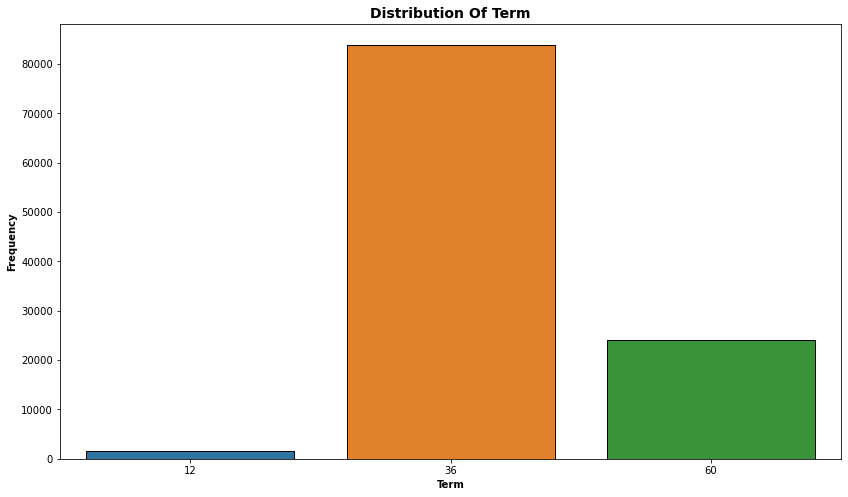

In [15]:
myCountPlot (df1,'Term')

>- **From the plot above, it appears that the term varied from 12 months  to 60 months. The term which has the most attributed loans is 36 months (3 years)  and 12 months (1 year) is the lenght of loan in months with the lowest values.**

**What is the distribution of LoanStatus?**

In [23]:
df1.LoanStatus.value_counts()

Current                   54484
Completed                 36607
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        793
Past Due (31-60 days)       356
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

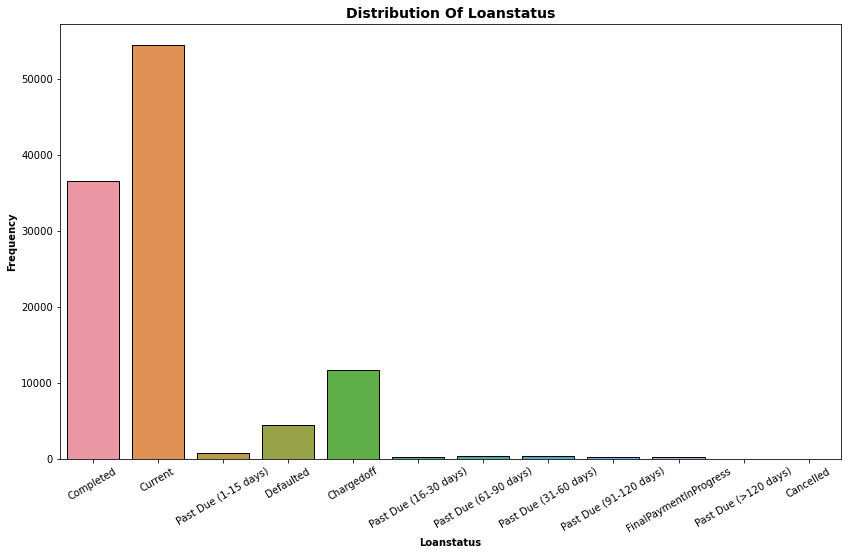

In [26]:
myCountPlot (df1,'LoanStatus')

>-Most of the Loans have as "Current" and "Completed" as a status

**What is the distribution of BorrowerAPR?**

In [63]:
#A function to draw a histogram #
def hist_plot_by(df, xVar, bins):
    plt.figure(figsize=[14,8])
    plt.hist(data = df, x =xVar, bins = bins)
    plt.title(f'''Distribution of {xVar}'''.title() ,fontsize=14, weight='bold')
     #Add x label and format it
    plt.xlabel(xVar.title(),fontsize=10 ,weight='bold')
    #plt.xlim([0,50000])
    #Add y label and format it
    plt.ylabel( 'Frequency' .title(),fontsize=10 ,weight='bold')  

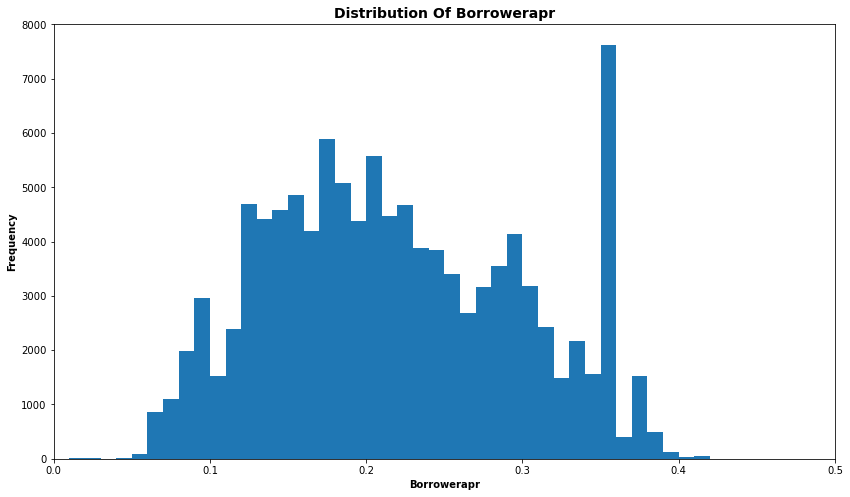

In [52]:
hist_plot_by(df1, 'BorrowerAPR', np.arange(0, df1.BorrowerAPR.max()+0.05, 0.01))

In [26]:
print('min=',df1.BorrowerAPR.min(),'max=',df1.BorrowerAPR.max())

min= 0.00653 max= 0.42395


>- **The Borrower APR varied from 0.00653% to 0.42395%, from the plot above, we can say that the most attributed APR is around 0.2%, and the distribution is multimodal**

**What is the distribution of BorrowerRate?**

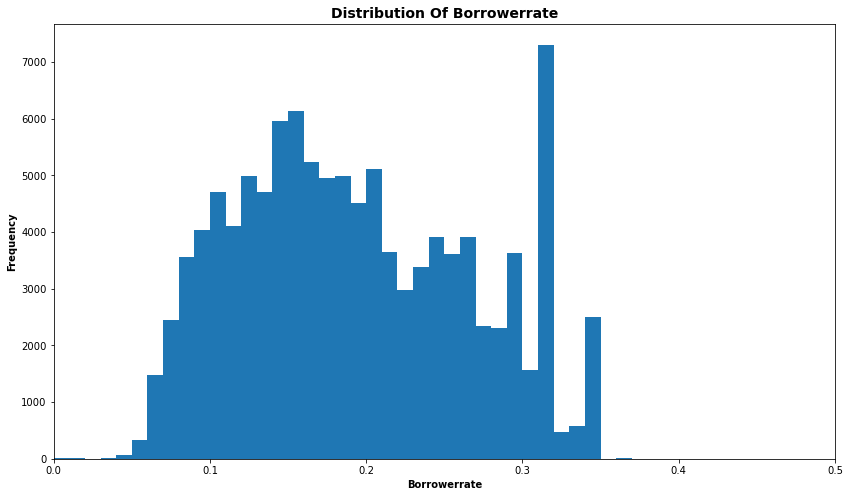

In [53]:
hist_plot_by(df1, 'BorrowerRate', np.arange(0, df1.BorrowerRate.max()+0.05, 0.01))

In [36]:
print('min=',df1.BorrowerRate.min(),'max=',df1.BorrowerRate.max())

min= 0.0 max= 0.36


>- **The Borrower's interest Rate varied from 0 to 0.36, from the plot above, we can say that the most attributed Borrower Rate is around 0.15 and the distribution is multimodal**

**What is the distribution of ListingCategory (Numeric)?**

In [33]:
labels=["0:Not Available","1:Debt Consolidation",'2:Home Improvement','3:Business','4:Personal Loan', 
        '5:Student Use','6:Auto','7:Other','8:Baby&Adoption','9:Boat','10:Cosmetic Procedure', '11:Engagement Ring', 
        '12:Green Loans','13:Household Expenses','14:Large Purchases','15:Medical/Dental','16:Motorcycle','17:RV',
        '18:Taxes', '19:Vacation','20:Wedding Loans']

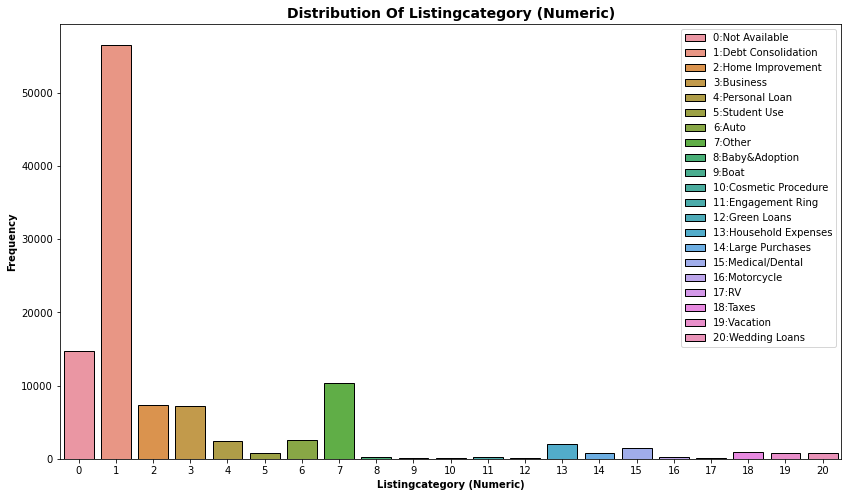

In [37]:
myCountPlot (df1,'ListingCategory (numeric)')

>- **From this visualization, it appears that most counted category of the listing that the borrower selected when posting their listing is Debt Consolidation.**

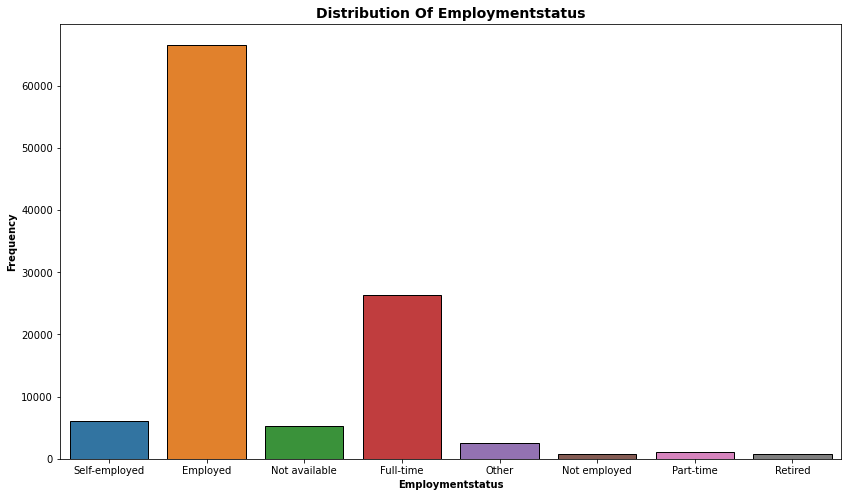

In [55]:
myCountPlot (df1,'EmploymentStatus')

>-Most of the borrowers are employed, and the unemployed ones have the lowest count.

**What is the distribution of Loan Original Amount?**

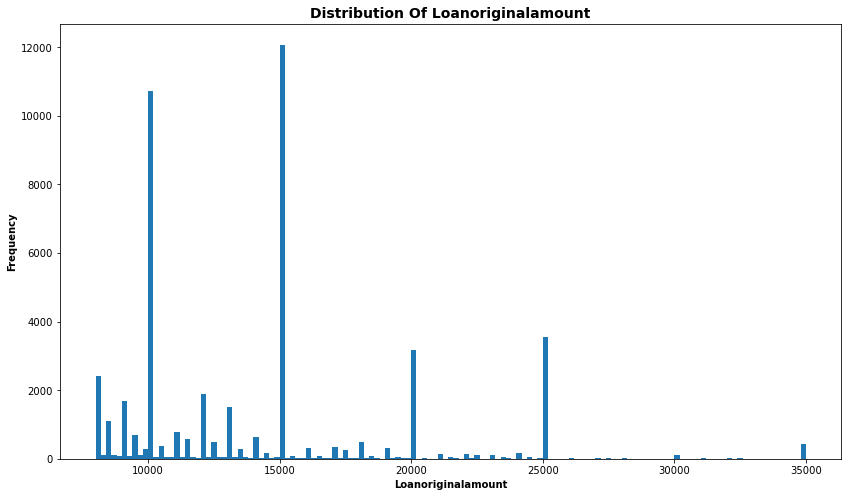

In [58]:
hist_plot_by(df1, 'LoanOriginalAmount', np.arange(8000, df1.LoanOriginalAmount.max()+200, 200))

In [36]:
print('min=',df1.LoanOriginalAmount.min(),'max=',df1.LoanOriginalAmount.max())

min= 1000 max= 35000


>- **The loans amount varied between 1000to 35000, the highest amount of loans attributed to borrowers is 15K, it seems also that the distribution is multimodal**

**What is the distribution of Stated Monthly Income?**

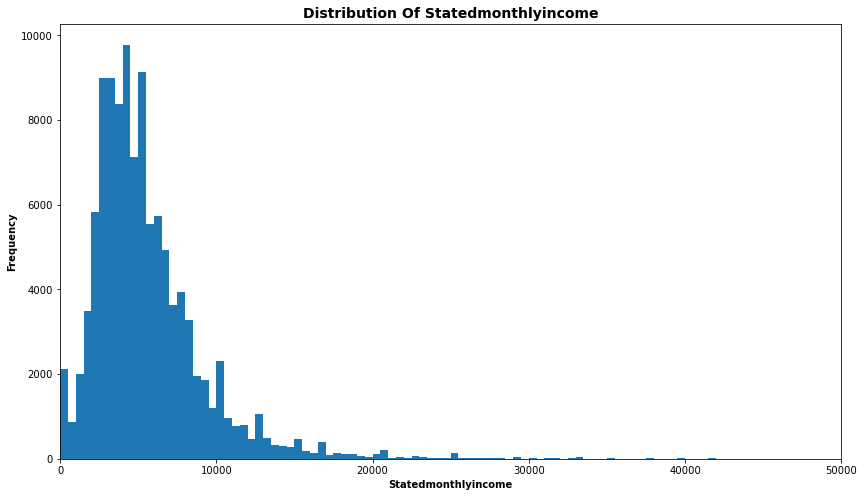

In [64]:
hist_plot_by(df1, 'StatedMonthlyIncome', np.arange(0, 50000, 500))

In [38]:
print('min=',df1.StatedMonthlyIncome.min(),'max=',df1.StatedMonthlyIncome.max())

min= 0.0 max= 1750002.91667


In [44]:
df1[(df1['StatedMonthlyIncome']>30000)]

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,ListingCategory (numeric),EmploymentStatus,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,CreditScoreRangeLower,CreditScoreRangeUpper
196,43C23665290560530B80B44,60,Current,0.15752,0.1346,Other,19,Employed,25000,33333.333333,574.73,840.0,859.0
224,5B37370457127496019ABA1,36,Current,0.13799,0.1099,Sales - Commission,1,Employed,30000,33333.333333,982.02,720.0,739.0
307,10E63700619265962788449,36,Current,0.15223,0.1239,Professional,1,Self-employed,15000,40000.000000,501.01,740.0,759.0
521,BCAD3406018743373403DCA,36,Completed,0.17420,0.1670,Doctor,0,Full-time,5000,30166.666667,177.52,640.0,659.0
637,0DA0368374080885437D515,36,Current,0.19236,0.1559,Doctor,2,Employed,35000,31666.666667,1223.42,740.0,759.0
667,82C833914965488381AC7DD,36,Chargedoff,0.15161,0.1445,Realtor,0,Full-time,25000,31666.666667,859.91,700.0,719.0
1003,D7033693337426893C5858C,36,Current,0.13799,0.1099,Construction,2,Self-employed,4000,41666.666667,130.94,700.0,719.0
1137,8B633666437206898FBB920,36,Completed,0.35797,0.3177,Executive,2,Employed,4000,37500.000000,173.71,700.0,719.0
1171,3D323657207491004E15820,60,Chargedoff,0.26887,0.2433,Doctor,1,Employed,25000,34813.250000,724.00,640.0,659.0
1304,507936305077862253C1A53,36,Completed,0.20200,0.1799,Other,1,Employed,10000,31250.000000,361.47,700.0,719.0


In [40]:
df1.StatedMonthlyIncome.sort_values().value_counts()

4166.666667      3380
5000.000000      3266
3333.333333      2791
3750.000000      2312
5416.666667      2287
5833.333333      2241
6250.000000      2197
4583.333333      2131
2500.000000      2111
6666.666667      2086
2916.666667      1891
8333.333333      1625
4333.333333      1475
7083.333333      1430
7500.000000      1402
0.000000         1381
3500.000000      1333
10000.000000     1235
4000.000000      1184
2083.333333      1172
3000.000000      1147
2666.666667      1058
6000.000000      1017
9166.666667       945
3166.666667       929
4500.000000       833
5166.666667       782
7916.666667       782
4666.666667       740
12500.000000      729
                 ... 
2710.083333         1
3381.250000         1
4714.250000         1
1842.166667         1
1593.833333         1
2201.666667         1
2198.333333         1
6082.583333         1
2357.750000         1
6111.416667         1
10560.583333        1
7655.000000         1
4717.750000         1
250000.000000       1
3733.58333

**What is the distribution of Lower and Upper Credit Score Range?**

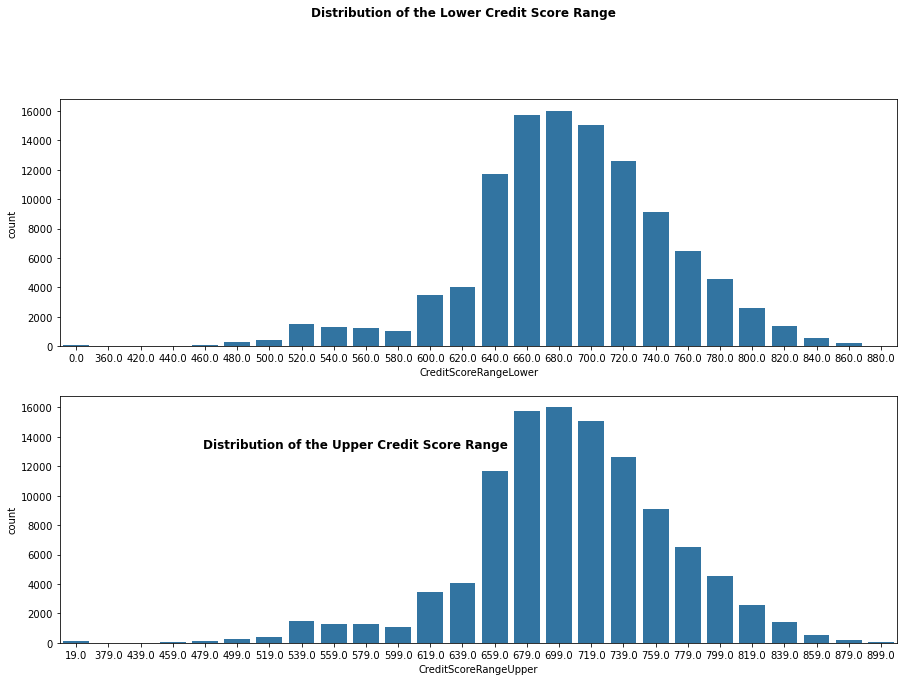

In [97]:
# let's plot the Lower and Upper Credit Score Range.

fig, ax = plt.subplots(nrows=2, figsize = [15,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'CreditScoreRangeLower', color = default_color, ax = ax[0])
plt.figtext(0.5,1, 'Distribution of the Lower Credit Score Range ',fontsize=12, ha='center', va='center',weight='bold')
sb.countplot(data = df1, x = 'CreditScoreRangeUpper', color = default_color, ax = ax[1])
plt.figtext(0.4,0.4, 'Distribution of the Upper Credit Score Range ',fontsize=12, ha='center', va='center',weight='bold')
plt.show()

Text(0,0.5,'Counts')

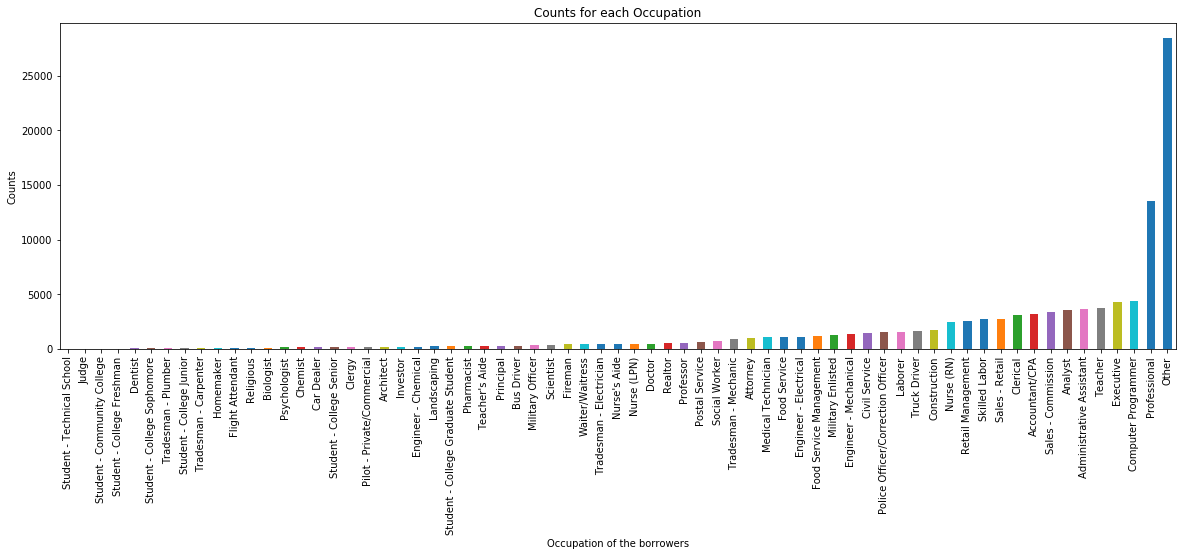

In [42]:
plt.figure(figsize=(20,6))
ax=df1.Occupation.value_counts().sort_values().plot(kind = 'bar')
plt.title('Counts for each Occupation')
plt.xlabel("Occupation of the borrowers")
plt.ylabel('Counts')

**The occupation of borrowers who have the maximum count, their occupation is "other", followed by professionnal and computer programmer, the feauture occupation does not giving us a clear idea about which sector tends to take loans.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some of variables are multimodal, and most of them do not need any transformations, except the StatedMonthlyIncome column, where incomes more than 30k need to be cleaned, some of borrowers with 30K dollars of income make a loan for 5000 dollars which make some doubts if they can be classified as outliers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the exploration step, they were some missing values in the variables of our interest, so we dropped them.Instead of having 113937 rows, we just explored  109535 rows.

>- **After dropping the values of StatedMonthlyIncome column more than 30k (315 rows) the shape of data will change obviously.**

In [45]:
df1 = df1[df1.StatedMonthlyIncome<=30000]

In [46]:
#the dataset contains 109220 rows for 13 loans features.
df1.shape

(109220, 13)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [87]:
numeric_vars =['LoanOriginalAmount', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome','MonthlyLoanPayment','CreditScoreRangeLower', 'CreditScoreRangeUpper']
categoric_vars = ['Term', 'ListingCategory (numeric)', 'EmploymentStatus']

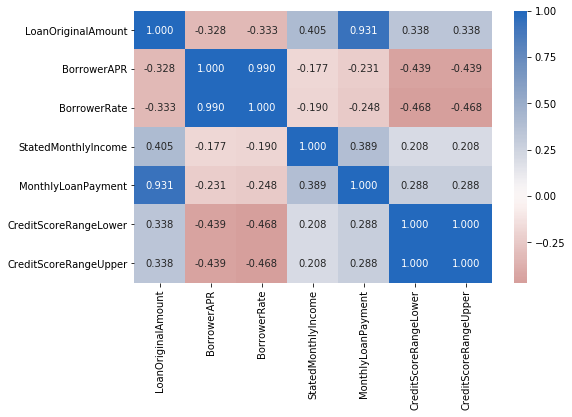

In [49]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

dataset.shape= (109220, 13)
df1_samp.shape= (500, 13)


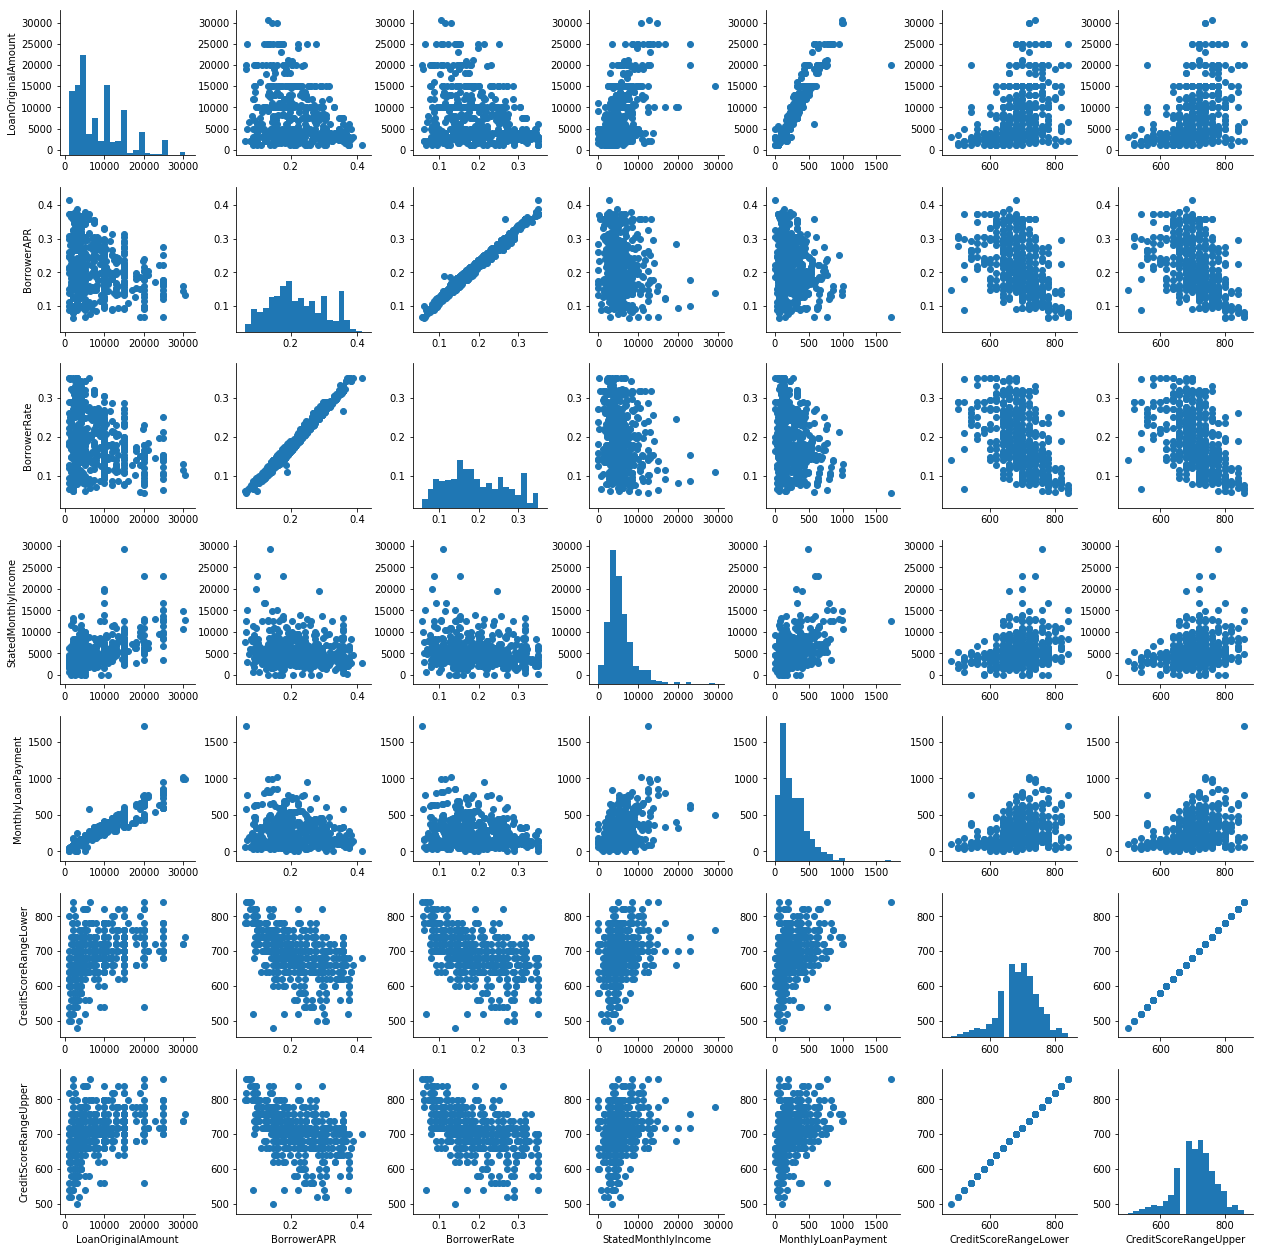

In [50]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
print("dataset.shape=",df1.shape)
df1_samp = df1.sample(n=500, replace = False)
print("df1_samp.shape=",df1_samp.shape)

g = sb.PairGrid(data = df1_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

-Let's discuss the correlation between the variables<br>
- **It appears from the plots above that Sated Monthly Income is negatively correlated with the Borrower APR and Borrower Rate, which means that if the Monthly income increase the Borrower ARP and Rate will descrease.** <br>
- **In other hand, the Monthly income is positively coorelated with the Loan Original Amount and the loan monthly payment.**<br>
- **The loan original amount is negatively correlated with the the Borrower APR and Borrower Rate, which means that if Loan original amount is high the Borrower APR and Rate are low.** <br> 
- **The Borrower APR and Borrower Rate are highly correlated.** <br>
- **The Borrower ARP and Borrower Rate are negalively correlated with the CreditScoreRangeLower and CreditScoreRangeUpper,The better your score, the lower your APR and Rate.** <br>

>-Let's see now the coorelation between Borrower APR and Rate with the categorical variables.


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

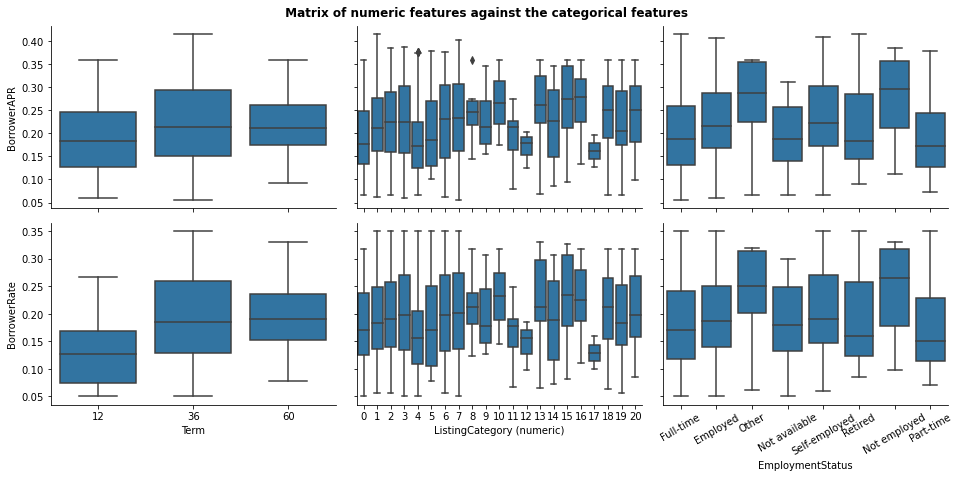

In [89]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(df1.shape[0], 2000, replace = False)

df1_samp = df1.sample(n=5000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10,10])
g = sb.PairGrid(data = df1_samp, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=30)
plt.figtext(0.5,1, ' Matrix of numeric features against the categorical features',fontsize=12, ha='center', va='center',weight='bold')
plt.show();

>- From the plot above, it appears that When the term of the loan is large the Borrower Rate is high, but for the Borrower APR The term 36 has a low BorrowerAPR and that's can be explained because most of the loan for this term has been completed, and obviously a good rating is attributed. <br>
The relation between the features 'ListingCategory (numeric)','EmploymentStatus' and our variables do not seem to be clear from this plot.

In [39]:
!pip install colorcet

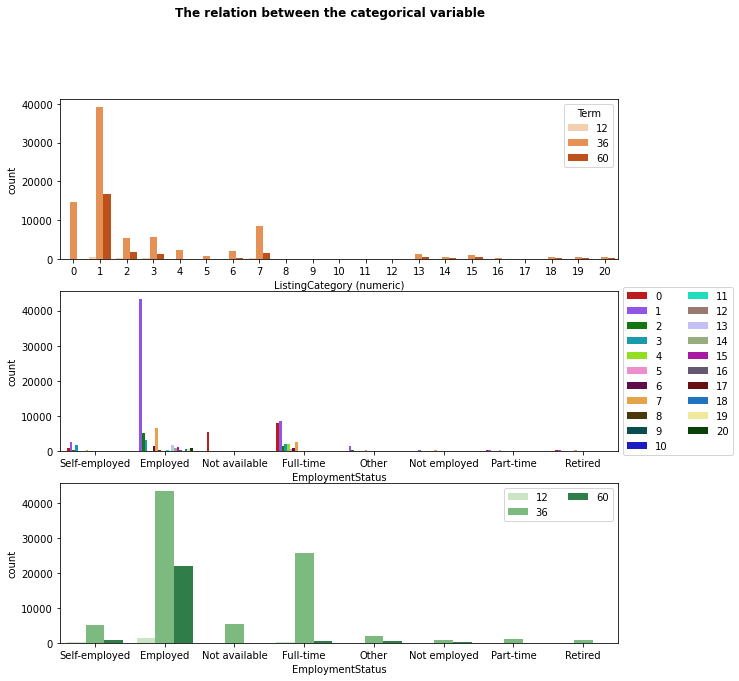

In [41]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])
# subplot 1:  'ListingCategory (numeric)' vs 'Term',
plt.subplot(3, 1, 1)
sb.countplot(data = df1, x = 'ListingCategory (numeric)', hue ='Term', palette = 'Oranges')
import colorcet as cc
palettes = sb.color_palette(cc.glasbey, n_colors=25)
# subplot 2: 'EmploymentStatus' vs  'ListingCategory (numeric)' 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df1, x = 'EmploymentStatus', hue = 'ListingCategory (numeric)', palette = palettes)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'EmploymentStatus' vs 'Term', use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df1, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.figtext(0.5,1, 'The relation between the categorical variable',fontsize=12, ha='center', va='center',weight='bold')
plt.show()

>- We can't assume from the plots above that there is a correlation between these categorical variables plotted.

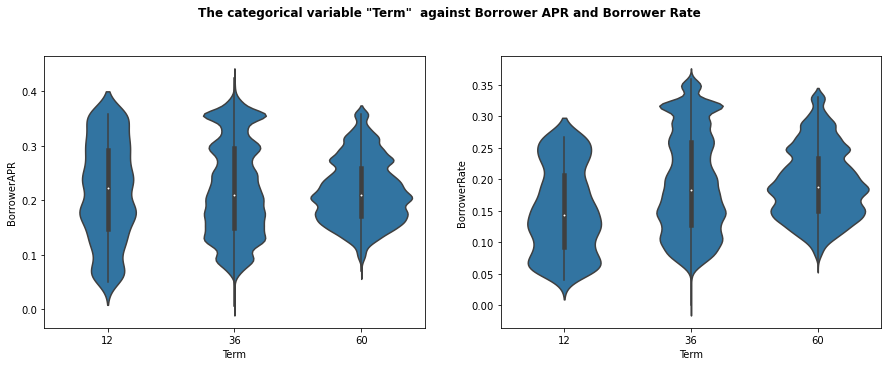

In [84]:
# plot the categorical variable Term  against Borrower APR and Borrower Rate, this time
# with full data and variable transforms
default_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])
sb.violinplot(data = df1, x = 'Term', y = 'BorrowerAPR', ax = ax[0],
               color = default_color)
sb.violinplot(data = df1, x = 'Term', y = 'BorrowerRate', ax = ax[1],color = default_color)
#plt.title('The categorical variable "Term"  against Borrower APR and Borrower Rate', ha='center',va='center')
plt.figtext(0.5,1, 'The categorical variable "Term"  against Borrower APR and Borrower Rate',fontsize=12, ha='center', va='center',weight='bold')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After studying the correlation, we can sum up that:
- The Monthly income is positively coorelated with the Loan Original Amount and the loan monthly payment.
-  Sated Monthly Income is negatively correlated with the Borrower APR and Borrower Rate, which means that if the Monthly income increase, the Loan Original Amount will increase and so that the loan monthly payment, which means in the other hand, the Borrower ARP and Rate will descrease.
- The Borrower APR and Borrower Rate are highly correlated, they both increase and they both decrease. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The Borrower ARP and Borrower Rate are negalively correlated with the CreditScoreRangeLower and CreditScoreRangeUpper,The better your score, the lower your APR and Rate.
- When the term of the loan is large the Borrower Rate is high, but for the Borrower APR The term 36 has a low BorrowerAPR and that's can be explained because most of the loan for this term has been completed, and obviously a good rating is attributed.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures  play into the relationship between 'BorrowerAPR' and 'LoanOriginalAmount'.

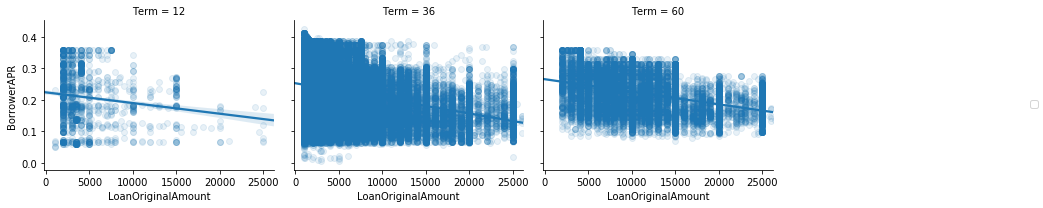

In [153]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df1, aspect=1.2, col='Term', col_wrap=4)
g.map(sb.regplot,'LoanOriginalAmount','BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

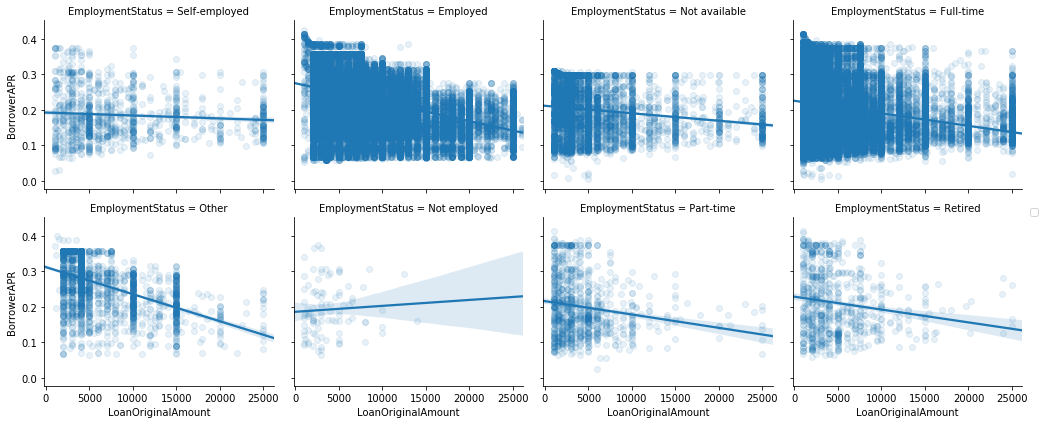

In [152]:
# Employment Status effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df1, aspect=1.2,col='EmploymentStatus', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

>-**The plots above explain that those categorical variales do not affect the relationship between the Loan Original Amount and the Borrower APR and so that the Borrower Rate**

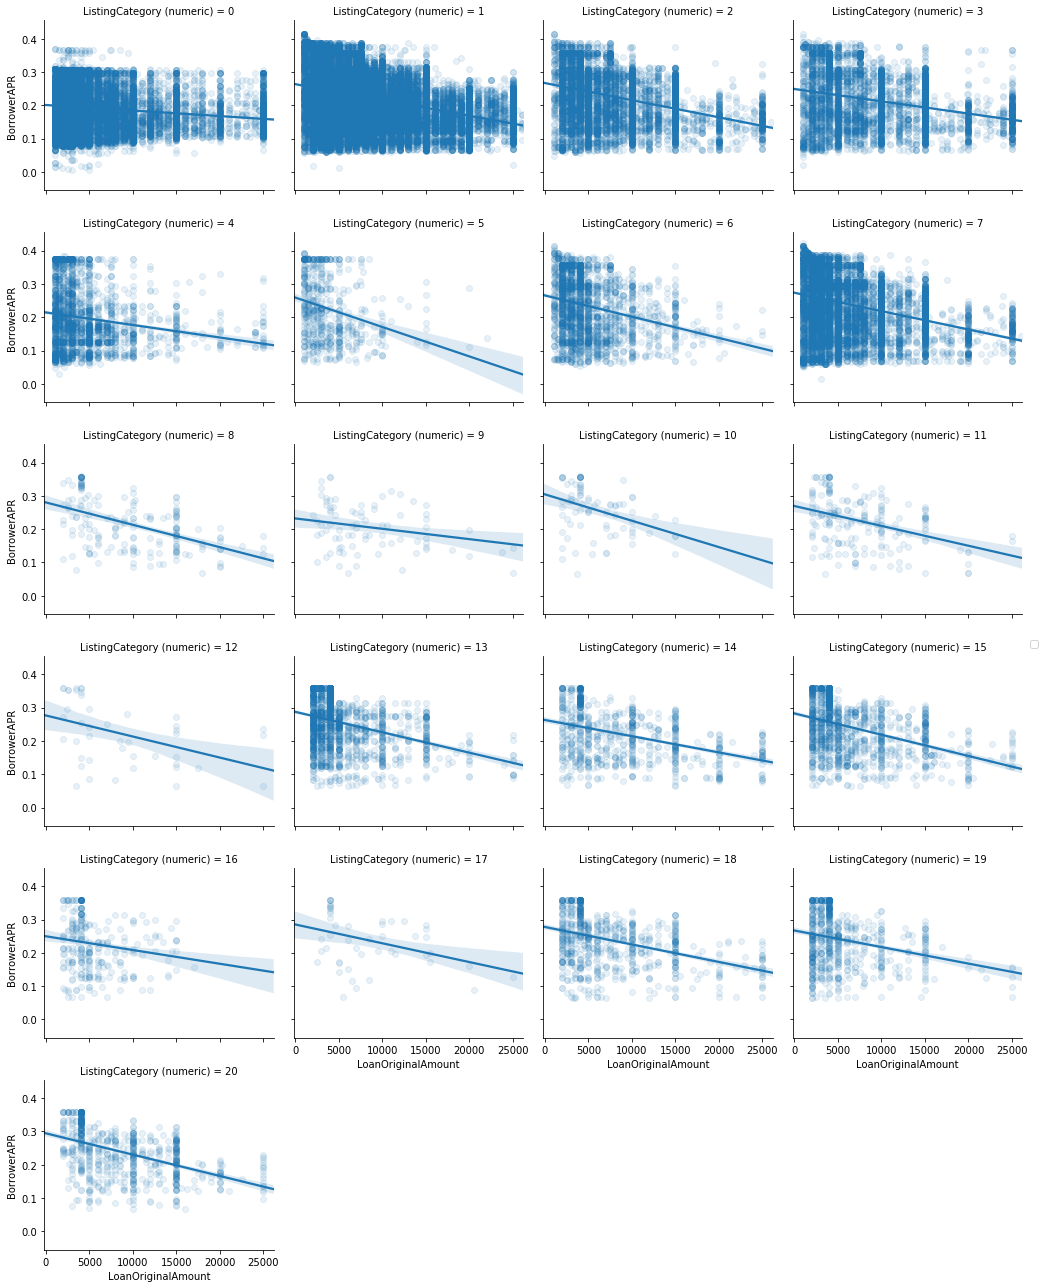

In [155]:
#Listing Category effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df1, aspect=1.2,col='ListingCategory (numeric)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

>-The category of the listing that the borrower selected when posting their listing:<br>
0 - Not Available,1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

>-**The figure above leads us to say that the Borrower APR variation interval differs from one category to another. Therefore, the type of loan affect the Borrower APR.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of Borrower APR against the Loan Original Amount in this section by looking at the impact of the three categorical features.The plots above explain that those categorical variales do not affect the relationship between the Loan Original Amount and the Borrower APR and so that the Borrower Rate since they are correlated. 

### Were there any interesting or surprising interactions between features?

> As concluded before, it doesn't seem like there's a systematic relation  between the three categorical features. However, the features also aren't fully independent.

## Conclusions
This project concerns the exploration of Loan Data, which contained 113937 loans with 81 variables on each loan in the begining,**the interest of this study concerns finding the features that affects the borrower’s APR or interest rate**, for that I choosed 13 variables from the original database which I saw that they can affect the variable of our interest, and before the exploration step, I did some cleaning, in order to make good conclusions and to have a non-biased dataset.<br>
After several visualizations exploring  the Univariate, Bivariate, and Multivariate relationships that can exist we can conclude that:<br>
The BorrowerAPR is affected directly with the following attributes:<br>
- Sated Monthly Income, when the incomes increases, the loan Original Amount increase and so that the loan monthly payment increase, and by that the BorrowerAPR decrease.<br>
- The CreditScoreRangeLower and CreditScoreRangeUpper: The better your score, the lower your APR and Rate.
- 'ListingCategory (numeric)': The Borrower APR variation interval differs from one category to another. Therefore, the type of loan affect also the Borrower APR.
- When the term of the loan is large the Borrower Rate increase,and that is not the case for the Borrower APR which decrease for the term 36 and that's can be explained because most of the loan for this term has been completed, and obviously a good rating is attributed.